# Análisis Numérico I - FIUBA (Cátedra Tarela)
# Ecuaciones No Lineales

## 1er cuatrimestre 2020

In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt
from sympy.calculus.util import continuous_domain

## Calculo del orden de conergencia

In [2]:
def orden_de_convergencia(errores):
    e1, e2, e3= errores[-3], errores[-2], errores[-1]
    P = math.log(e3/e2) / math.log(e2/e1)
    
    print("P: ", P)

In [3]:
orden_de_convergencia([0.31980, 0,.16240,0.08650,0.04230,0.01356,0.00219])

P:  1.6026038058119243


## 1. MÉTODOS DE ARRANQUE

Función que comprueba si el teorema del Bolzano se cumple para un intervalo en cierta función. Es decir, combrueba si hay una raiz en el intervalo para cierta función.

In [4]:
def cumple_teorema_del_bolzano(f,intervalo):
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    return(f(a)*f(b)<0)

## 1.1 Método bisección

Calcula la cantidad de pasos o iteraciones a realizar en el método biseccion para encontrar una raíz en cierto interalo con cierto valor absoluto.

In [5]:
def biseccion_cant_pasos(intervalo, error_absoluto):
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    return np.log2((b-a)/error_absoluto)

Calcula el error absoluo del método biseccion para encontrar una raíz en cierto interalo con cierto n número de iteraciones o pasos.

In [6]:
def biseccion_error_asoluto(intervalo, n):
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    return (b-a)/(2**n)

Calcula la raíz de una función en un intervalo utilizando el método numérico bisección.
La condición de corte es el error absoluto.

In [7]:
def biseccion_1(f,intervalo,error_absoluto):
        
    i = 0
    
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    
    errores = [np.float64((b-a)/2)]
    
    if(not cumple_teorema_del_bolzano(f,intervalo)):
        print("No cumple teorema del Bolzano")
        return
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}\n".format("i","m","a","b", "error"))

    while(errores[-1] >= np.float64(error_absoluto)):

        m = (a+b)/2

        print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i,m,a,b,errores[-1]))
        
        if(f(m)==0): return m
        
        if(f(m)*f(a)<0 ):
            b = m
        else:
            a = m
        
        i+=1
        errores.append((b-a)/2)
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i,(a+b)/2,a,b,errores[-1]))
    
    print("\n\nRaiz: ", m)
    
    return errores

Calcula la raíz de una función en un intervalo utilizando el método numérico bisección.
La condición de corte es la cantidad de iteraciones o pasos a realizar.

In [8]:
def biseccion_2(f,intervalo,n_iteraciones):
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}\n".format("i","m","a","b", "error"))
    
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    
    errores = [np.float64((b-a)/2)]
    
    if( not cumple_teorema_del_bolzano(f,intervalo)):
        print("No cumple teorema del Bolzano")
        return
    
    for i in range(n_iteraciones-1):
                
        m = (a+b)/2
        
        print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i,m,a,b,errores[-1]))
        
        if(f(m)==0): return m
        
        if(f(m)*f(a)<0 ):
            b = m
        else:
            a = m
        
        errores.append((b-a)/2)
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i+1,(a+b)/2,a,b,errores[-1]))
    
    print("\n\nRaiz: ", m)
    
    return errores

### 1.1.1 Ejemplo

In [9]:
def f(x):
    return 2*x - np.exp(-x)

In [10]:
cumple_teorema_del_bolzano(f,[0,1])

True

In [11]:
biseccion_error_asoluto([0,1], 6)

0.015625

In [12]:
biseccion_cant_pasos([0,1],0.02)

5.643856189774724

In [13]:
errores = biseccion_1(f,[0,1],0.02)

  i                    m                    a                    b                error

  0                  0.5                  0.0                  1.0                  0.5
  1                 0.25                  0.0                  0.5                 0.25
  2                0.375                 0.25                  0.5                0.125
  3               0.3125                 0.25                0.375               0.0625
  4              0.34375               0.3125                0.375              0.03125
  5             0.359375              0.34375                0.375             0.015625


Raiz:  0.34375


In [14]:
errores = biseccion_2(f,[0,1],6)

  i                    m                    a                    b                error

  0                  0.5                  0.0                  1.0                  0.5
  1                 0.25                  0.0                  0.5                 0.25
  2                0.375                 0.25                  0.5                0.125
  3               0.3125                 0.25                0.375               0.0625
  4              0.34375               0.3125                0.375              0.03125
  5             0.359375              0.34375                0.375             0.015625


Raiz:  0.34375


In [15]:
orden_de_convergencia(errores)

P:  1.0


##### Ejemplo parcial

In [16]:
errores = [(1.593411251-1.556724973),-(1.556724973-1.573672129), -(1.573672129-1.577113197)]
orden_de_convergencia(errores)

P:  2.064369355544681


In [17]:
biseccion_error_asoluto([1.1593411251,1.575413197], 9)

0.0008126407654296874

## 1.2 Método Regula-Falsi

Calcula la raíz de una función en un intervalo utilizando el método numérico Regula-Falsi.
La condición de corte es el error absoluto.

In [18]:
def regula_falsi(f,intervalo,error_absoluto):
        
    i = 0
    
    a = np.float64(intervalo[0])
    b = np.float64(intervalo[1])
    
    
    if(not cumple_teorema_del_bolzano(f,intervalo)):
        print("No cumple teorema del Bolzano")
        return
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}\n".format("i","m","a","b", "error"))
    
    m = [0]
    errores = [np.inf]

    while(errores[-1] >= np.float64(error_absoluto)):

        m.append(a - (b-a)*(f(a)/(f(b)-f(a))))
        errores.append(abs(m[-2]-m[-1]))
        print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i,m[-1],a,b,errores[-1]))
        
        if(f(m[-1])==0): return m[-1]
        
        if(f(m[-1])*f(a)<0 ):
            b = m[-1] 
        else:
            a = m[-1]
        
        i+=1
        
    
    m.append(a - (b-a)*(f(a)/(f(b)-f(a))))
    errores.append(abs(m[-2]-m[-1]))
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(i,(a+b)/2,a,b,errores[-1]))
    
    print("\n\nRaiz: ", m[-1])
    
    return errores[2:]

### 1.2.1 Ejemplo

In [19]:
def f(x):
    return 2*x - np.exp(-x)

In [20]:
cumple_teorema_del_bolzano(f,[0,1])

True

In [21]:
errores = regula_falsi(f,[0,1],0.002)

  i                    m                    a                    b                error

  0   0.3799218073981598                  0.0                  1.0   0.3799218073981598
  1  0.35311057005576196                  0.0   0.3799218073981598  0.02681123734239782
  2  0.35180129704735125                  0.0  0.35311057005576196 0.0013092730084107163
  3  0.17590064852367562                  0.0  0.35180129704735125 6.426741923926116e-05


Raiz:  0.351737029628112


In [22]:
orden_de_convergencia(errores)

P:  0.9982861959901163


## 2. MÉTODOS ITERATIVOS

In [23]:
def graph(f, intervalo):
    
    i1, i2 = intervalo[0], intervalo[1]
    
    x = np.linspace(i1,i2,100)
    y = [f(p) for p in x]
                 
    plt.plot(x, y)  
    plt.show()

In [24]:
def cumple_condiciones_punto_fijo(g, intervalo):
    
    x = sp.Symbol('x')
    y = g(x)
    
    Intervalo_continuidad_g = continuous_domain(y, x, sp.S.Reals)
    g_derivada =  y.diff(x)
    Intervalo_continuidad_g_derivada = continuous_domain(g_derivada, x, sp.S.Reals)

    print("g(x)=",y)
    print("Continua en [{},{}]:".format(intervalo[0],intervalo[1]), Intervalo_continuidad_g)
    print("Imagen de g(x) pertenece a [{},{}]:".format(intervalo[0],intervalo[1]),"\n")
    graph(g, intervalo)
    

    print("Existe g'(x)=",g_derivada)
    print("g'(x) es continua en [{},{}]:".format(intervalo[0],intervalo[1]), Intervalo_continuidad_g_derivada)
    print("Existe k<|g'(x)|<1 en [{},{}]:".format(intervalo[0],intervalo[1]))
    graph(sp.lambdify(x, g_derivada, "math"), intervalo)

## 2.1 Método de punto fijo

In [25]:
def error_relativo(actual, anterior):
    return abs((actual-anterior)/actual)

In [26]:
def metodo_punto_fijo_1(g, p, error_relativo):
    
    print("{: >3} {: >20} {: >20}".format("k","x","error"))
        
    k = 0
    x = np.float64(p)
    anterior = x
    actual = g(x)
    
    errores_relativos = [error_relativo(actual, anterior)]
    
    while(error_relativos[-1] >= error_relativo):
        
        print("{: >3} {: >20} {: >20}".format(k,actual,error_relativos[-1]))
        
        anterior = actual
        actual = g(anterior)
        
        k += 1
        errores_relativos.append(error_relativo(actual, anterior))

    print("{: >3} {: >20} {: >20}".format(k,actual,error_relativos[-1]))
    print("\n\nRaiz: ", actual)
    
    return errores_relativos

In [27]:
def metodo_punto_fijo_2(g, p, error_absoluto):
    
    print("{: >3} {: >20} {: >20} {: >20}".format("k","Xn","Xn+1","error"))
    
    k = 0

    anterior = np.float64(p)
    actual = np.float64(g(p))
    
    errores_absolutos = [abs(actual-anterior)]
            
    while(errores_absolutos[-1] >= error_absoluto):
                
        print("{: >3} {: >20} {: >20} {: >20}".format(k,anterior,actual,errores_absolutos[-1]))
        
        anterior = actual
        actual = g(anterior)
        
        k += 1
        errores_absolutos.append(abs(actual-anterior))

    print("{: >3} {: >20} {: >20} {: >20}".format(k,anterior, actual, errores_absolutos[-1]))
    
    print("\n\nRaiz: ", actual)
    
    return errores_absolutos

### 2.1.1 Ejemplo

In [28]:
def f(x):
    return sp.sin(0.1*x)+0.3*x-2.3

In [29]:
g = lambda x: (-sp.sin(0.1*x)+2.3)/0.3

g(x)= 7.66666666666667 - 3.33333333333333*sin(0.1*x)
Continua en [-12,1]: Reals
Imagen de g(x) pertenece a [-12,1]: 



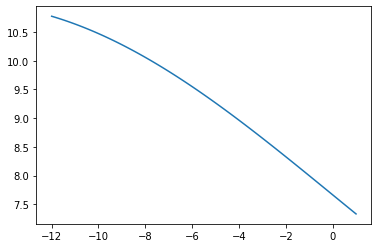

Existe g'(x)= -0.333333333333333*cos(0.1*x)
g'(x) es continua en [-12,1]: Reals
Existe k<|g'(x)|<1 en [-12,1]:


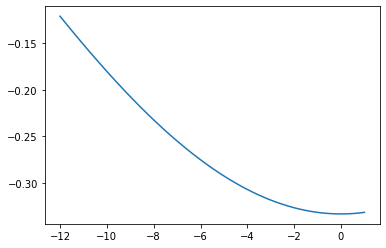

In [30]:
cumple_condiciones_punto_fijo(g,[-12,1])

In [31]:
errores = metodo_punto_fijo_2(g, 1, 0.5)

  k                   Xn                 Xn+1                error
  0                  1.0   7.3338886111772394   6.3338886111772394
  1   7.3338886111772394     5.43536302186739     1.89852558930985
  2     5.43536302186739     5.94278037442140    0.507417352554015
  3     5.94278037442140     5.80029761244930    0.142482761972099


Raiz:  5.80029761244930


In [32]:
orden_de_convergencia(errores)

P:  0.9625720137035136


In [33]:
errores[-1]

0.142482761972099

#### Ejemploi

## 2.2 Método de Newton-Raphson

Función que devuelve el polinomio de Newton Raphson

In [34]:
def g_nr(f):
    
    x = sp.Symbol('x')
    y = f(x)

    yderivada =  y.diff(x)
    
    g_nr = x - y/yderivada
    
    print(g_nr)
        
    return sp.lambdify(x, g_nr, "sympy")

In [35]:
def f(x):
    return sp.sin(x) + 3*x - 8

In [36]:
g_nr(f)

x - (3*x + sin(x) - 8)/(cos(x) + 3)


<function _lambdifygenerated>

Función que ayuda a identificar si se cumplen las condiciones para utilizar el método de Newton Raphson.

In [37]:
# función auxiliar de la función newton_raphson_condiciones

def cumple_extra_nr(f, intervalo):
        
    x = sp.Symbol('x')
    y = f(x)
    
    f_derivada =  y.diff(x)
    f_derivada_doble =  f_derivada.diff(x)
        
    print("Existe  f''(x)=", f_derivada_doble)
    print("f'(x)!=0 para todo [{},{}]:".format(intervalo[0],intervalo[1]))
    graph(sp.lambdify(x, f_derivada, "sympy"), intervalo)

In [38]:
def newton_raphson_condiciones(f, g, intervalo):
    
    print("CONDICIONES EXTRA NEWTON RAPHSON\n")
    cumple_extra_nr(f, intervalo)
    
    print("CONDICIONES DE PUNTO FIJO\n")
    cumple_condiciones_punto_fijo(g,intervalo)
    

### 2.2.1 Ejemplo

In [39]:
def f(x):
    return (x**2)/4 - sp.sin(x)

In [40]:
g = g_nr(f)

x - (x**2/4 - sin(x))/(x/2 - cos(x))


In [41]:
# BUG: hay que agregar manualmente las dependencias a la libreria sp.
# Necesita que usemos sp y no math u otra.
g_NR = lambda x: x - ((x**2)/4 - sp.sin(x))/(x/2 - sp.cos(x))

CONDICIONES EXTRA NEWTON RAPHSON

Existe  f''(x)= sin(x) + 1/2
f'(x)!=0 para todo [1.8,2]:


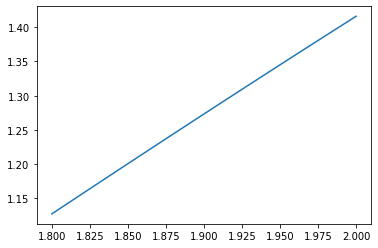

CONDICIONES DE PUNTO FIJO

g(x)= x - (x**2/4 - sin(x))/(x/2 - cos(x))
Continua en [1.8,2]: Complement(Reals, Union(Complement(ConditionSet(x, Eq(2*x - 4*cos(x), 0), Reals), ConditionSet(x, Eq(-x**2 + 2*x*(x - 2*cos(x)) + 4*sin(x), 0), Complexes)), ConditionSet(x, Eq(2*x - 4*cos(x), 0), Reals)))
Imagen de g(x) pertenece a [1.8,2]: 



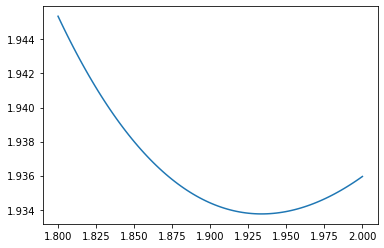

Existe g'(x)= -(x**2/4 - sin(x))*(-sin(x) - 1/2)/(x/2 - cos(x))**2
g'(x) es continua en [1.8,2]: Complement(Reals, Union(Complement(ConditionSet(x, Eq((x - 2*cos(x))**2, 0), Reals), Union(ConditionSet(x, Eq(x**2 - 4*sin(x), 0), Complexes), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/6), Integers), ImageSet(Lambda(_n, 2*_n*pi + 11*pi/6), Integers))), ConditionSet(x, Eq(x - 2*cos(x), 0), Reals)))
Existe k<|g'(x)|<1 en [1.8,2]:


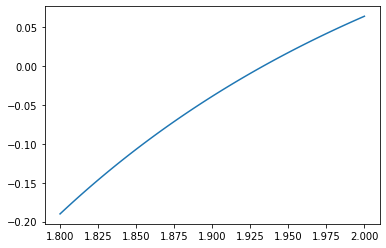

In [42]:
newton_raphson_condiciones(f,g_NR,[1.8,2])

In [43]:
errores = metodo_punto_fijo_2(g_NR, 1.8, 0.01)

  k                   Xn                 Xn+1                error
  0                  1.8   1.9453578126314672   0.1453578126314672
  1   1.9453578126314672     1.93382579422516   0.0115320184063046
  2     1.93382579422516     1.93375376564266 0.0000720285825019928


Raiz:  1.93375376564266


In [44]:
orden_de_convergencia(errores)

P:  2.0030297632237692


##### Ejemplo parcial

In [45]:
def f(x):
    return sp.sin(x) +3*x-8

In [46]:
g = g_nr(f)

x - (3*x + sin(x) - 8)/(cos(x) + 3)


## 2.3 Método de Secante

In [47]:
def g_secante(f):
    return lambda x1,x2: x2 - f(x2)* ((x2 -x1)/(f(x2)-f(x1)))

In [48]:
def metodo_secante_1(g, semilla1, semilla2, error_absoluto):
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format("k","Xn-1","Xn","Xn+1","error"))
    
    k = 0

    anterior1 = np.float64(semilla1)
    anterior2 = np.float64(semilla2)
    actual = g(anterior1, anterior2)
    
    errores = [abs(actual-anterior2)]

            
    while(errores[-1] >= error_absoluto):
                
        print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(k,anterior1, anterior2,actual,errores[-1]))
        
        anterior1 = anterior2
        anterior2 = actual
        actual = g(anterior1, anterior2)
        
        k += 1
        errores.append(error_relativo(actual, anterior2))

    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(k,anterior1, anterior2, actual, errores[-1]))
    
    print("\n\nRaiz: ", actual)
    
    return errores

In [49]:
def metodo_secante_2(g, semilla1, semilla2, error_relativo):
    
    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format("k","Xn-1","Xn","Xn+1","error"))
        
    k = 0
    
    anterior1 = np.float64(semilla1)
    anterior2 = np.float64(semilla2)
    actual = g(anterior1, anterior2)
    
    errores = [error_relativo(actual, anterior2)]
    
    while(errores[-1] >= error_relativo):
        
        print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(k,anterior1, anterior2,actual,errores[-1]))
        
        anterior1 = anterior2
        anterior2 = actual
        actual = g(anterior1, anterior2)
        
        k += 1
        errores.append(error_relativo(actual, anterior2))

    print("{: >3} {: >20} {: >20} {: >20} {: >20}".format(k,anterior1, anterior2, actual, errores[-1]))
    
    print("\n\nRaiz: ", actual)
    
    return errores

### 2.2.1 Ejemplo

In [50]:
def f(x):
    return (x**2)/4 - sp.sin(x)

In [51]:
g_secante = g_secante(f)

In [52]:
# g_secante es la aproximación discreta del polinomio de Newton Raphson.
# Luego, se probó anteriormente que el polinomio convergía en el intervalo [1.8,2]
errores = metodo_secante_1(g_secante, 1.75, 1.875, 0.001)

  k                 Xn-1                   Xn                 Xn+1                error
  0                 1.75                1.875     1.94063310911454   0.0656331091145357
  1                1.875     1.94063310911454     1.93352709066909  0.00367515846027375
  2     1.94063310911454     1.93352709066909     1.93375292004736 0.000116782953979575


Raiz:  1.93375292004736


In [53]:
orden_de_convergencia(errores)

P:  1.1965493563205216
